In [106]:
import math
import numpy as np
import pandas as pd
from pandas import DataFrame
%matplotlib inline
import matplotlib.pyplot as plt
import operator

In [107]:
# Data of user7
files = ['session_0041905381.csv','session_1060325796.csv', 'session_3320405034.csv', 'session_3826583375.csv', 'session_6668463071.csv', 'session_8961330453.csv', 'session_9017095287.csv']

In [108]:
# Function to return dot product of two vectors
def dot(vA, vB):
    return np.dot(vA, vB)


# Function to return cross product of two vectors
def cross(vA, vB):
    return np.cross(vA, vB)


# Returns the angle between two lines
def angle(lineA, lineB):
    vA = tuple(map(operator.sub, lineA[1], lineA[0]))
    vB = tuple(map(operator.sub, lineB[1], lineB[0]))
    dot_prod = dot(vA, vB)
    magA = dot(vA, vA)**0.5
    magB = dot(vB, vB)**0.5
    cos_ = dot_prod/magB/magA
    if(cos_ > 1):
        cos_ = 1
    if (cos_ < -1):
        cos_ = -1
    angle = math.acos(cos_)
    return angle


# Returns the curvature distance
def cDist(lineA, P):
    vA = tuple(map(operator.sub, lineA[1], lineA[0]))
    vB = tuple(map(operator.sub, P, lineA[0]))
    c = cross(vA, vB)
    c = dot(c, c)**0.5
    mag = dot(vA, vA)**0.5
    c /= (mag**2)
    return c

In [109]:
featureVec1 = [None]*8
featureVec2 = [[] for _ in range(4)]
hLine = [(0,0), (1, 0)]

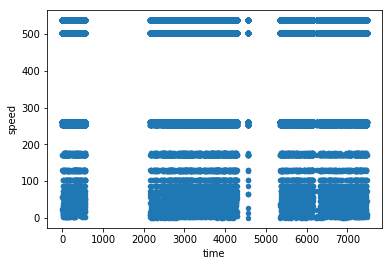

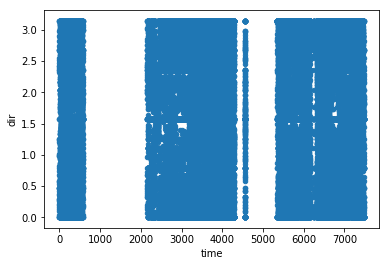

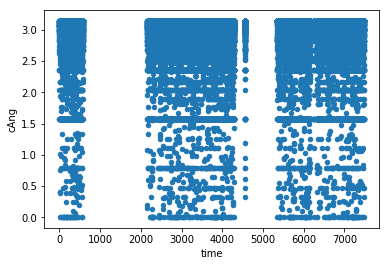

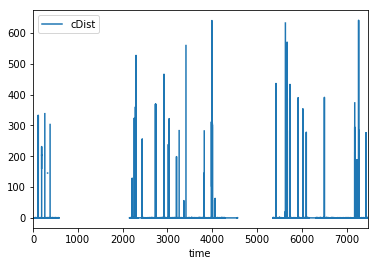

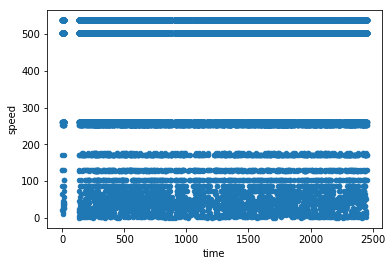

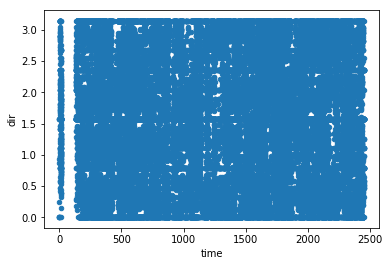

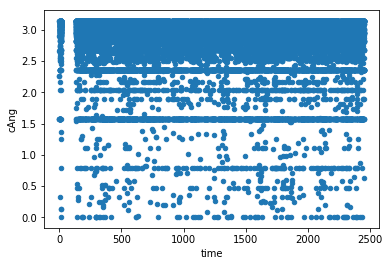

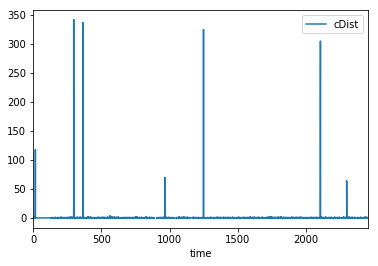

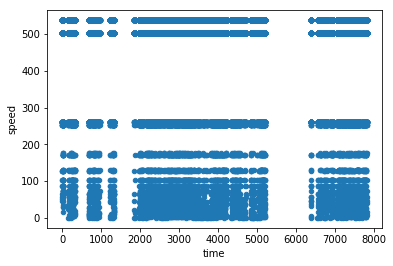

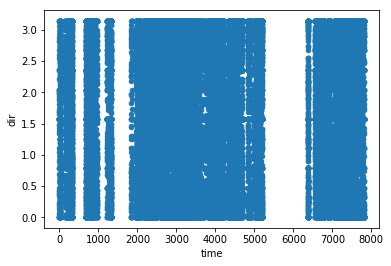

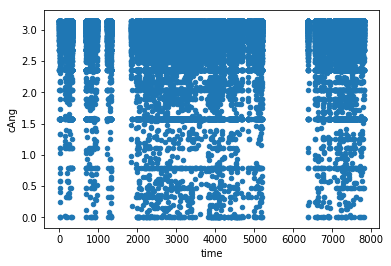

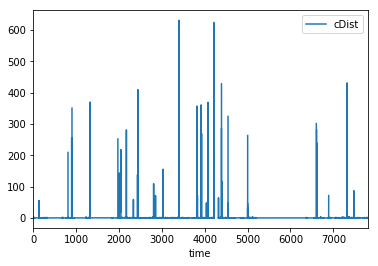

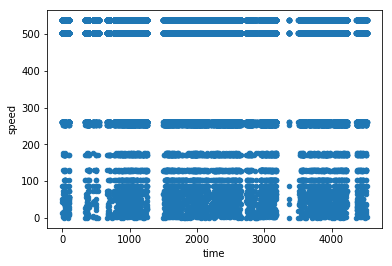

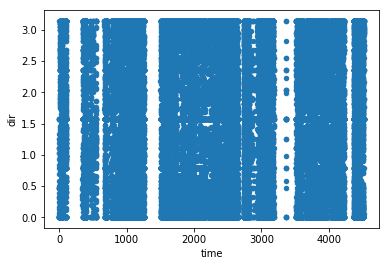

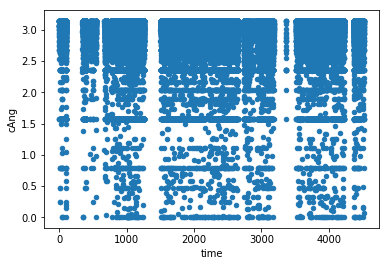

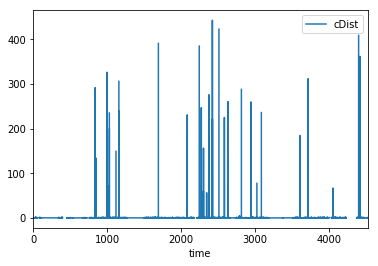

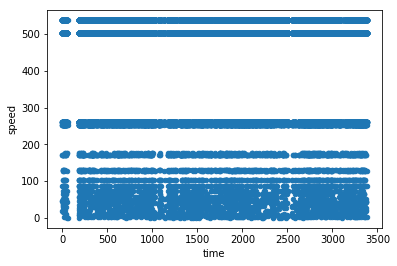

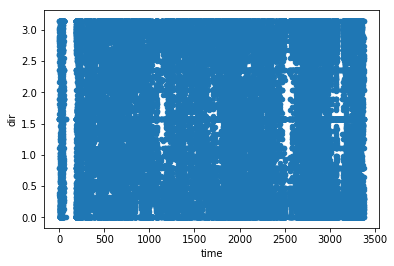

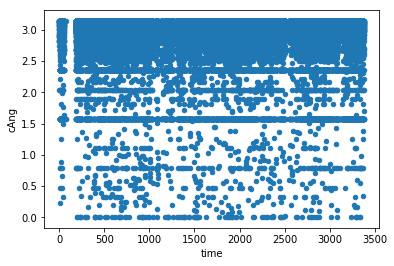

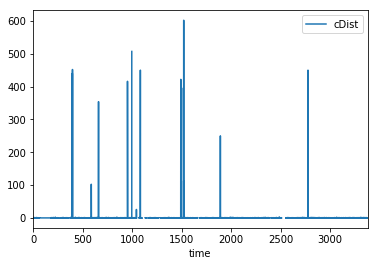

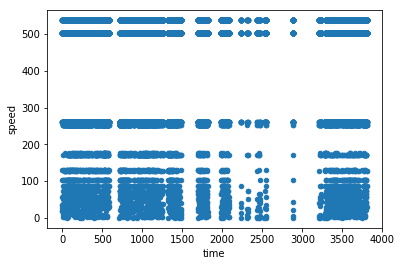

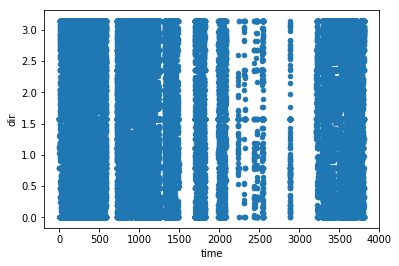

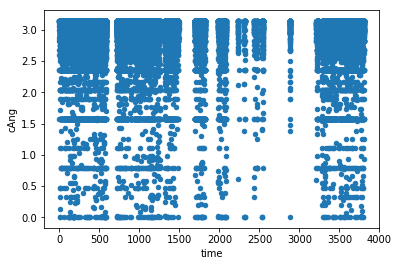

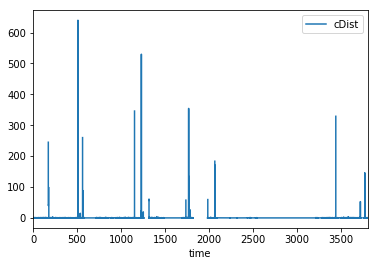

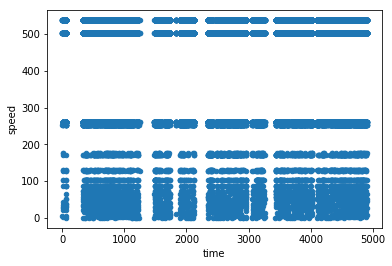

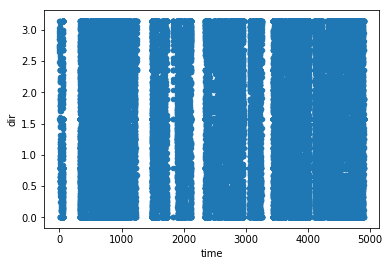

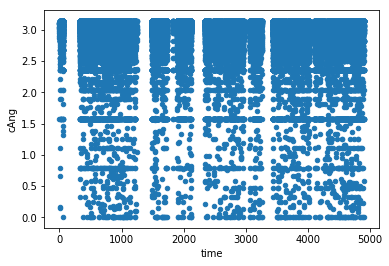

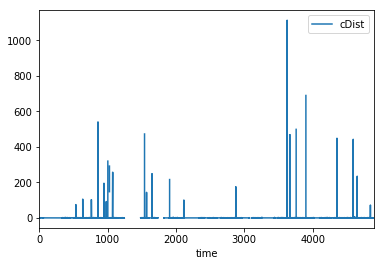

In [110]:
for f in files:
    df = pd.read_csv(f)
    F = pd.DataFrame()
    timeVec = []
    speedVec = []
    dirVec = []
    cAngVec = []
    cDistVec = []
    dragTime = 0
    stTime = 0
    clicks = 0
    for index, row in df.iterrows():
        if(row['state'] == 'Pressed'):
            stTime = row['client timestamp']
        if(row['state'] == 'Released'):
            dragTime += row['client timestamp'] - stTime
            clicks += 1
        if (index == 0):
            continue
            
        pt1 = (row['x'], row['y'])
        pt2 = (df['x'][index-1], df['y'][index-1])
        
        if((pt1[0] == pt2[0] and pt1[1] == pt2[1]) or (row['client timestamp'] == df['client timestamp'][index-1])):
            continue
            
        timeVec.append(row['client timestamp'])
        
        # Calculate speed
        speed = np.linalg.norm(tuple(map(operator.sub, p1, p2)))/(row['client timestamp'] - df['client timestamp'][index-1])
        speedVec.append(speed)
        lineA = [pt2, pt1]
        
        # Calculate direction
        dirVec.append(angle(hLine, lineA))
        
        if(index <= 1):
            cAngVec.append(None)
            cDistVec.append(None)
            continue
        
        pt3 = (df['x'][index-2], df['y'][index-2])
        if(pt1 == pt2 or  pt1 == pt3 or pt2 == pt3):
            cAngVec.append(None)
            cDistVec.append(None)
            continue;
        
        # Calculate angle of curvature 
        lineB = [pt2, pt3]
        cAngVec.append(ang(lineB, lineA))
        
        # Calculate curvature distance
        lineC = [pt1, pt3]
        cDistVec.append(lineDist(lineC, pt2))
    
    F['time'] = timeVec
    F['speed'] = speedVec
    F['dir'] = dirVec
    F['cAng'] = cAngVec
    F['cDist'] = cDistVec
    features = np.array([speedVec, dirVec, cAngVec, cDistVec], dtype=object)
    featureVec2 = np.column_stack((featureVec2, features))
    
    features = np.array([F['speed'].mean(), F['dir'].mean(), F['cAng'].mean(), F['cDist'].mean(), df['x'].mean(), df['y'].mean(), dragTime, clicks/df['client timestamp'].max()])
    featureVec1 = np.column_stack((featureVec1, features))
    
    F.plot.scatter(x='time', y ='speed')
    F.plot.scatter(x='time', y ='dir')
    F.plot.scatter(x='time', y ='cAng')
    F.plot(x='time', y ='cDist')

In [111]:
featureVec1 = featureVec1[:,1:]
df1=pd.DataFrame(data=featureVec1,index=['meanSpeed','meanDir','meanCAng','meanCDist', 'meanX', 'meanY', 'dragTime', 'avgClicks'])
df1

,0,1,2,3,4,5,6
meanSpeed,425.994,441.782,447.945,444.272,439.377,444.709,438.832
meanDir,1.59536,1.58615,1.57243,1.56554,1.60363,1.58703,1.57102
meanCAng,2.8058,2.85328,2.81727,2.7988,2.84217,2.82229,2.83126
meanCDist,0.42572,0.133313,0.304652,0.237051,0.185517,0.203146,0.297963
meanX,309.073,378.597,292.62,285.646,396.212,279.06,338.097
meanY,363.604,383.183,349.437,357.395,370.782,292.8,336.432
dragTime,361.868,143.805,168.694,170.366,210.905,101.888,163.267
avgClicks,0.172203,0.287881,0.116437,0.166747,0.348537,0.191336,0.229133


In [112]:
df2=pd.DataFrame(data=featureVec2,index=['speed','dir','cAng','cDist'])
df2

,0,1,2,3,4,5,6,7,8,9,...,381664,381665,381666,381667,381668,381669,381670,381671,381672,381673
speed,503.891,503.891,537.484,503.891,537.484,503.891,503.891,260.073,537.484,503.891,...,537.484,260.073,503.891,503.891,25.8406,537.484,503.891,537.484,251.946,537.484
dir,0,0,0.104877,0.033321,0.132552,0.156602,0.2783,0.291457,0.266252,0.558599,...,0.785398,1.5708,0.785398,1.5708,1.5708,1.5708,1.89255,1.89255,1.89255,1.5708
cAng,None,3.14159,3.03672,3.07004,2.97572,3.11754,3.01989,3.12844,3.11639,2.84925,...,2.81984,2.35619,2.35619,2.35619,None,3.14159,2.81984,3.14159,3.14159,2.81984
cDist,None,0,0.0205882,0.0170124,0.0370188,0.00592718,0.0303391,0.00318471,0.00493151,0.0729412,...,0.08,0.2,0.2,0.2,None,0,0.0810811,0,0,0.0769231
